In [22]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [23]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_NW_1.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,NaN,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [24]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	15
float64		column 2	41
float64		column 3	41
float64		column 4	45
float64		column 5	65
float64		column 6	40
float64		column 7	40
float64		column 8	25
float64		column 9	25
float64		column 10	35
float64		column 11	30
float64		column 12	41
float64		column 13	36
float64		column 14	35
float64		column 15	50
float64		column 16	56
float64		column 17	35
float64		column 18	45
float64		column 19	45
float64		column 20	40
float64		column 21	45
float64		column 22	45
float64		column 23	45
float64		column 24	30
float64		column 25	45
float64		column 26	35
float64		column 27	40
float64		column 28	56
float64		column 29	25
float64		column 30	61
float64		column 31	40
float64		column 32	15
float64		column 33	40
float64		column 34	25
float64		column 35	45
float64		column 36	40
float64		column 37	35
float64		column 38	45
float64		column 39	30
float64		column 40	21
float64		column 41	41
float64		column 42	35
float64		column 43	45
float64		column 44	35
flo

In [25]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4582.000000,4556.000000,4556.000000,4552.000000,4532.000000,4557.000000,4557.000000,4572.000000,4572.000000,4562.000000,...,4577.000000,4531.000000,4557.000000,4547.000000,4546.000000,4536.000000,4556.000000,4567.000000,4547.000000,4552.000000
mean,0.103470,0.210413,0.279813,0.066129,0.311011,0.095425,0.113526,0.104696,0.089722,0.232416,...,0.031752,0.038782,0.138638,0.017037,0.267331,0.075562,0.043071,5.199551,51.475258,280.420914
std,0.303894,1.279404,0.503756,1.402625,0.673713,0.273883,0.391057,0.399954,0.277986,0.579437,...,0.286279,0.245209,0.269954,0.109868,0.811517,0.246330,0.426060,31.845206,194.164151,590.708393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.589000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.277000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.187000,0.000000,0.313000,0.052250,0.000000,3.703000,43.000000,265.250000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,11.110000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

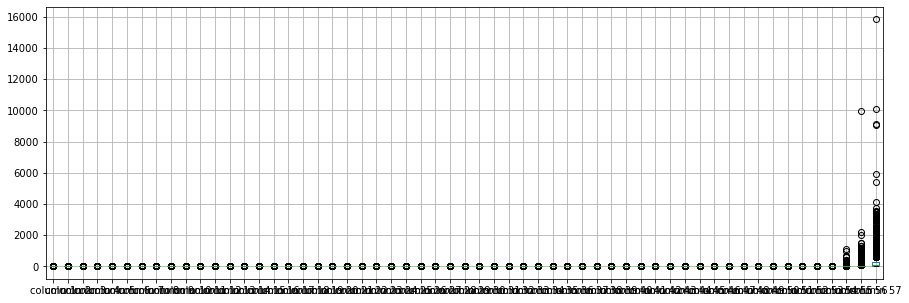

In [26]:
df.boxplot(return_type='axes', figsize=(15,5))

In [27]:
df.mean()

column 1       0.103470
column 2       0.210413
column 3       0.279813
column 4       0.066129
column 5       0.311011
column 6       0.095425
column 7       0.113526
column 8       0.104696
column 9       0.089722
column 10      0.232416
column 11      0.059790
column 12      0.540740
column 13      0.094155
column 14      0.055594
column 15      0.048186
column 16      0.243598
column 17      0.141933
column 18      0.181496
column 19      1.661514
column 20      0.085861
column 21      0.800514
column 22      0.120272
column 23      0.101153
column 24      0.094009
column 25      0.541487
column 26      0.265261
column 27      0.768163
column 28      0.122625
column 29      0.099031
column 30      0.102833
column 31      0.064940
column 32      0.047244
column 33      0.095975
column 34      0.047165
column 35      0.106076
column 36      0.096294
column 37      0.136401
column 38      0.013339
column 39      0.078798
column 40      0.064854
column 41      0.043916
column 42      0

In [28]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.015140,0.066685,0.013657,0.023773,0.058832,0.005042,-0.006224,0.106511,0.051104,...,-0.017418,-0.026232,-0.021783,-0.032980,0.059013,0.114963,-0.010263,0.044775,0.058128,0.091429
column 2,-0.015140,1.000000,-0.033148,-0.006496,-0.021991,-0.023811,0.005261,-0.015726,-0.003848,0.036339,...,-0.015290,-0.006896,-0.050393,-0.018426,-0.012947,-0.009014,0.001719,0.002541,-0.000280,-0.023204
column 3,0.066685,-0.033148,1.000000,-0.020296,0.079286,0.084557,0.037504,0.012635,0.091282,0.039328,...,-0.026770,-0.032299,-0.022233,-0.036198,0.108447,0.084508,-0.006247,0.098396,0.102501,0.072157
column 4,0.013657,-0.006496,-0.020296,1.000000,0.006964,-0.009975,0.020075,0.010499,-0.002410,-0.004933,...,-0.001952,-0.000642,-0.012251,-0.007204,-0.002912,0.011183,-0.000176,0.005211,0.022481,0.022332
column 5,0.023773,-0.021991,0.079286,0.006964,1.000000,0.050988,0.147782,0.026990,0.021819,0.037727,...,-0.031681,-0.031979,-0.042216,-0.028231,0.026202,0.039783,0.000234,0.052974,0.050214,0.003241
column 6,0.058832,-0.023811,0.084557,-0.009975,0.050988,1.000000,0.062907,0.079588,0.118242,0.016093,...,-0.031446,-0.019172,-0.006455,-0.014821,0.064848,0.099721,0.020267,-0.010345,0.090189,0.083311
column 7,0.005042,0.005261,0.037504,0.020075,0.147782,0.062907,1.000000,0.043695,0.052054,0.067570,...,-0.030943,-0.032705,-0.050330,-0.027434,0.054988,0.068515,0.046957,0.041428,0.059145,-0.008083
column 8,-0.006224,-0.015726,0.012635,0.010499,0.026990,0.079588,0.043695,1.000000,0.105144,0.089991,...,-0.021090,-0.027742,-0.031106,-0.021912,0.032389,0.055830,-0.010389,0.011514,0.037851,0.041054
column 9,0.106511,-0.003848,0.091282,-0.002410,0.021819,0.118242,0.052054,0.105144,1.000000,0.145142,...,-0.025895,-0.014153,-0.030849,0.013743,0.042942,0.146484,-0.004403,0.111427,0.183437,0.252530
column 10,0.051104,0.036339,0.039328,-0.004933,0.037727,0.016093,0.067570,0.089991,0.145142,1.000000,...,-0.017188,0.013988,0.003975,0.008979,0.045239,0.089709,0.052364,0.079356,0.112309,0.099867


In [29]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [30]:
imputer = md.Midas(layer_structure = [17,17+16,17+16+16,17+16+16+16,17+16+16,17+16,17], vae_layer = False, seed = 160)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 663.5538608138985
Epoch: 1 , loss: 668.8950313873822
Epoch: 2 , loss: 667.5605642604496
Epoch: 3 , loss: 665.6714855818798
Epoch: 4 , loss: 668.834550066692
Epoch: 5 , loss: 659.003745527633
Epoch: 6 , loss: 657.7966707874258
Epoch: 7 , loss: 664.6102575375228
Epoch: 8 , loss: 663.3803050077751
Epoch: 9 , loss: 655.5754248323341
Epoch: 10 , loss: 661.1533471084223
Epoch: 11 , loss: 658.9642892232755
Epoch: 12 , loss: 593.5567893849018
Epoch: 13 , loss: 563.8892273587217
Epoch: 14 , loss: 545.888770552047
Epoch: 15 , loss: 536.7401933836189
Epoch: 16 , loss: 524.2176503836071
Epoch: 17 , loss: 528.9604947824512
Epoch: 18 , loss: 509.76962088873995
Epoch: 19 , loss: 527.0804551021563
Epoch: 20 , loss: 516.6713066765656
Epoch: 21 , loss: 506.2998138587234
Epoch: 22 , loss: 508.5010841183546
Epoch: 23 , loss: 500.15386386033964
Epoch: 24 , loss: 500.34567420241723
Epoch: 25 , loss: 505.56964220319475
Epoch

In [31]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [32]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000
column 2      0.000
column 3      0.000
column 4      0.000
column 5      0.000
column 6      0.000
column 7      0.000
column 8      0.000
column 9      0.000
column 10     0.000
column 11     0.000
column 12     0.000
column 13     0.000
column 14     0.000
column 15     0.000
column 16     0.000
column 17     0.000
column 18     0.000
column 19     0.000
column 20     0.000
column 21     0.000
column 22     0.000
column 23     0.000
column 24     0.000
column 25     0.000
column 26     0.000
column 27     0.000
column 28     0.000
column 29     0.000
column 30     0.000
column 31     0.000
column 32     0.000
column 33     0.000
column 34     0.000
column 35     0.000
column 36     0.000
column 37     0.000
column 38     0.000
column 39     0.000
column 40     0.000
column 41     0.000
column 42     0.000
column 43     0.000
column 44     0.000
column 45     1.440
column 46     0.000
column 47     0.000
column 48     0.000
column 49     0.000
column 50     0.196


In [33]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [34]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.380145,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [35]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [36]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [37]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

10486.92464695516

In [38]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [39]:
NRMS=numerator/denominator
NRMS


0.22096970375415428

In [40]:
new_df.iloc[66,:]

column 1       0.000000
column 2       0.440000
column 3       0.890000
column 4       0.000000
column 5       0.440000
column 6       0.000000
column 7       0.000000
column 8       0.114116
column 9       0.000000
column 10      0.000000
column 11      0.000000
column 12      0.440000
column 13      0.000000
column 14      0.000000
column 15      0.000000
column 16      0.440000
column 17      0.000000
column 18      0.890000
column 19      2.240000
column 20      0.000000
column 21      1.340000
column 22      0.000000
column 23      0.000000
column 24      0.000000
column 25      0.000000
column 26      0.000000
column 27      0.000000
column 28      0.000000
column 29      0.000000
column 30      0.000000
column 31      0.000000
column 32      0.000000
column 33      0.000000
column 34      0.000000
column 35      0.000000
column 36      0.000000
column 37      0.000000
column 38      0.000000
column 39      0.000000
column 40      0.000000
column 41      0.000000
column 42      0

In [41]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.380145,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.000000,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.310000,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.000000,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.000000,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.000000,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.000000,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.000000,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.000000,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [42]:
imputations[-1].to_excel("Spam_NW_1(imp).xlsx", index=False, header=False)